In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# %matplotlib.inline
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.size

47040000

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0].size

784

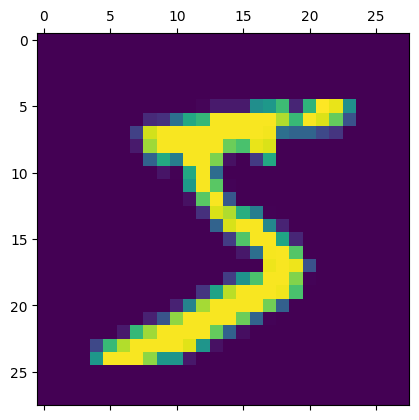

In [8]:
plt.matshow(X_train[0])

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [14]:
X_test_flattened.shape

(10000, 784)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4767 - accuracy: 0.8740
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9251


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2668 - accuracy: 0.9252


[0.26683831214904785, 0.9251999855041504]

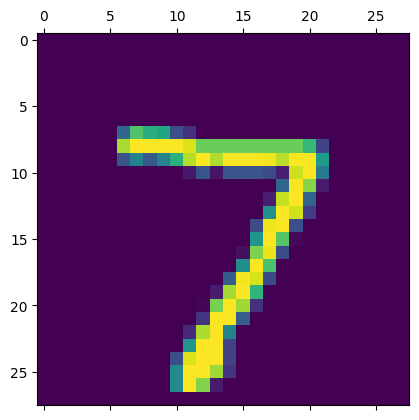

In [17]:
plt.matshow(X_test[0])

In [18]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [19]:
y_predicted[0]

array([2.7720504e-02, 4.0788731e-07, 7.0573501e-02, 9.6632499e-01,
       3.2604765e-03, 1.2310360e-01, 1.6321931e-06, 9.9982953e-01,
       1.1711641e-01, 7.2270787e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[0])

7

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [25]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    7,    2,    3,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    8,  927,   17,   12,    2,   11,   10,   39,    3],
       [   1,    0,   22,  927,    1,   20,    1,   11,   18,    9],
       [   1,    1,    3,    1,  927,    0,   10,    4,    8,   27],
       [   8,    3,    4,   41,   12,  763,   13,    8,   33,    7],
       [  13,    3,    6,    1,    7,   10,  913,    2,    3,    0],
       [   1,    6,   22,    7,    9,    0,    0,  954,    2,   27],
       [   5,   10,    7,   29,   10,   21,    9,   13,  864,    6],
       [   9,    7,    1,   10,   39,    4,    0,   30,    7,  902]])>

Text(95.72222222222221, 0.5, 'Truth')

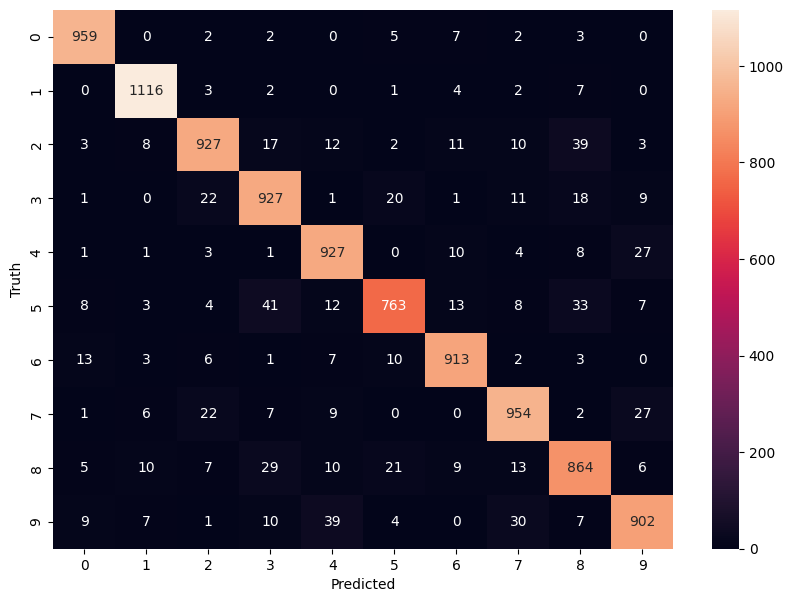

In [26]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2639 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1198 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0834 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0635 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0506 - accuracy: 0.9843


In [28]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9737


[0.078334279358387, 0.9736999869346619]

In [29]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [30]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [31]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

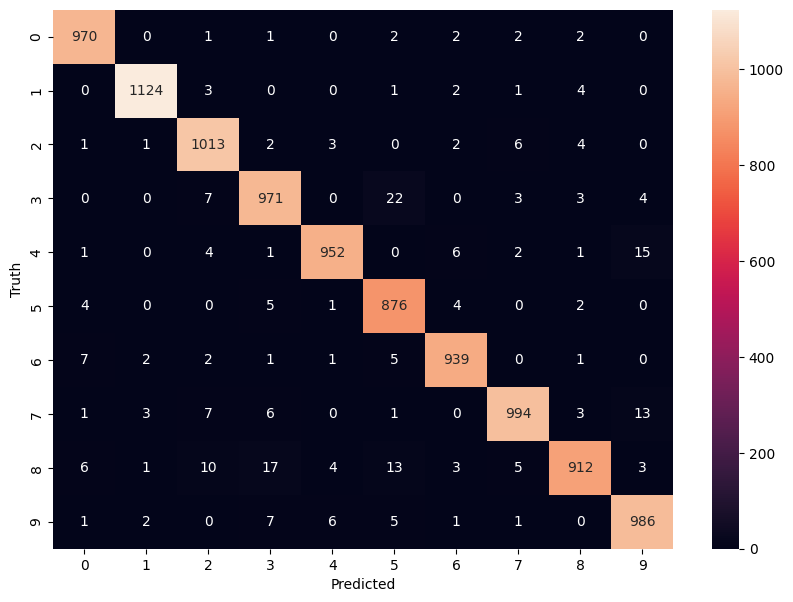

In [32]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2174 - accuracy: 0.9354
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0926 - accuracy: 0.9718
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0626 - accuracy: 0.9798
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0470 - accuracy: 0.9848
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0361 - accuracy: 0.9883


In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0755 - accuracy: 0.9790


[0.07551253587007523, 0.9789999723434448]

In [35]:
%load_ext tensorboard
%tensorboard --logdir logs/adam